## Whitney Bases

In [1]:
from sympy import *
from sympy.abc import x

In [2]:
p = Piecewise((0, x<=-1), (x+1, x<0), (-x+1, x<=1), (0, True))

In [3]:
l = lambdify((x,), p)
(l(-2), l(-1), l(-1/2), l(0), l(1/2), l(1))

(0, 0, 0.5, 1, 0.5, 0)

In [4]:
def F(x):
    if -1<x<=0:
        return x+1
    if 0<x<1:
        return -x+1
    return 0

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
xx = np.linspace(-1.5, 1.5, 1000)
def L(xx):
    return np.array([l(x_) for x_ in xx])

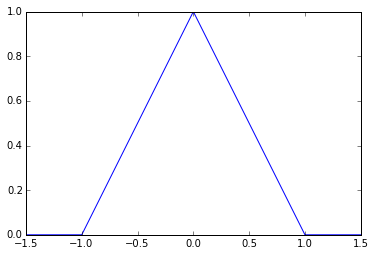

In [7]:
plt.plot(xx, L(xx))

In [8]:
a, b, c = (
    integrate(p, (x, -Rational(1,2), Rational(1, 2))),
    integrate(p, (x, 0, Rational(1, 2))),
    integrate(p, (x, Rational(1,2), Rational(3, 2))),
)
a, b, c

(3/4, 3/8, 1/8)

In [9]:
H = np.array([
        [b, c, 0, 0, 0],
        [c, a, c, 0, 0],
        [0, c, a, c, 0],
        [0, 0, c, a, c],
        [0, 0, 0, c, b],
    ])
H

array([[3/8, 1/8, 0, 0, 0],
       [1/8, 3/4, 1/8, 0, 0],
       [0, 1/8, 3/4, 1/8, 0],
       [0, 0, 1/8, 3/4, 1/8],
       [0, 0, 0, 1/8, 3/8]], dtype=object)

In [10]:
Hinv = np.linalg.inv(H.T)
Hinv

array([[ 2.82843137, -0.48529412,  0.08333333, -0.01470588,  0.00490196],
       [-0.48529412,  1.45588235, -0.25      ,  0.04411765, -0.01470588],
       [ 0.08333333, -0.25      ,  1.41666667, -0.25      ,  0.08333333],
       [-0.01470588,  0.04411765, -0.25      ,  1.45588235, -0.48529412],
       [ 0.00490196, -0.01470588,  0.08333333, -0.48529412,  2.82843137]])

In [11]:
h = Hinv[0,:]
h

array([ 2.82843137, -0.48529412,  0.08333333, -0.01470588,  0.00490196])

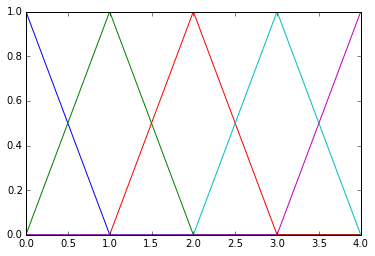

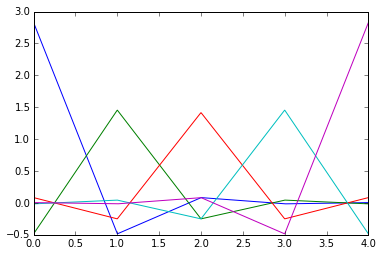

In [12]:
def R(h, j):
    return lambda x: sum(L(x-i)*Hinv[i, j] for i in range(len(h)))

xx = np.linspace(0, len(h)-1, 1000)

plt.figure()
plt.plot(xx, L(xx-0), 
         xx, L(xx-1), 
         xx, L(xx-2),
         xx, L(xx-3),
         xx, L(xx-4),
        )

plt.figure()
plt.plot(xx, R(h, 0)(xx), 
         xx, R(h, 1)(xx), 
         xx, R(h, 2)(xx),
         xx, R(h, 3)(xx),
         xx, R(h, 4)(xx),
        )